## Analysis of Data Stored

In [6]:
import pandas as pd
from pymongo import MongoClient
from dotenv import load_dotenv


#### First let's define useful functions

In [13]:
import datetime

def get_month(datetime):
    return datetime.month

def get_year(datetime):
    return datetime.year

def get_utc_time(timestamp):
    # Convert timestamp to UTC datetime
    utc_time = datetime.datetime.utcfromtimestamp(timestamp)
    return utc_time

#### Import data stored in the dataset

- Let's connect to the Db in order to extract Data 

In [9]:

# Load environment variables from .env file
load_dotenv()
mongo='127.0.0.1'

try:
    # Connect to MongoDB
    myclient = MongoClient(
                        "mongodb://"+mongo+":27017/",  
                        username='admin',
                        password='admin') #Mongo URI format
    db=myclient['reddit']
    print("Connected to MongoDB successfully!")
except Exception as e:
    print("An error occurred while connecting to MongoDB:", e)

Connected to MongoDB successfully!


In [10]:
#import
posts_registered=[]
query=db.reddit_posts.find({},{'_id':0})
for el in query:
    posts_registered.append(el)
posts_registered_df=pd.DataFrame(posts_registered)
posts_registered_df.head()

,id,title,author,score,num_comments,upvote_ratio,url,subreddit,created_at,self_text,searchQuery
0,1et3kj0,Diagnosed with Inattentive ADHD at 31. Explain...,amadnomad,393,107,0.98,https://www.reddit.com/r/ADHD/comments/1et3kj0...,ADHD,1.723749e+09,Please go out and get tested if you are still ...,adhd
1,1et3kj0,Diagnosed with Inattentive ADHD at 31. Explain...,amadnomad,386,107,0.98,https://www.reddit.com/r/ADHD/comments/1et3kj0...,ADHD,1.723749e+09,Please go out and get tested if you are still ...,adhd
2,1et3kj0,Diagnosed with Inattentive ADHD at 31. Explain...,amadnomad,392,107,0.98,https://www.reddit.com/r/ADHD/comments/1et3kj0...,ADHD,1.723749e+09,Please go out and get tested if you are still ...,adhd
3,1gk5ftv,Children with higher IQ scores were diagnosed ...,Pretend_Voice_3140,4499,466,0.99,https://www.reddit.com/r/ADHD/comments/1gk5ftv...,ADHD,1.730809e+09,A study was published in the [British Journal ...,adhd
4,1f0k9en,Reminder: If you made it to adulthood with lat...,Hipster-Deuxbag,7372,535,0.99,https://www.reddit.com/r/ADHD/comments/1f0k9en...,ADHD,1.724547e+09,"We all know the statistics: 20,000 behavioral ...",adhd


- Some Plots in order to asses the distribution of our dataset

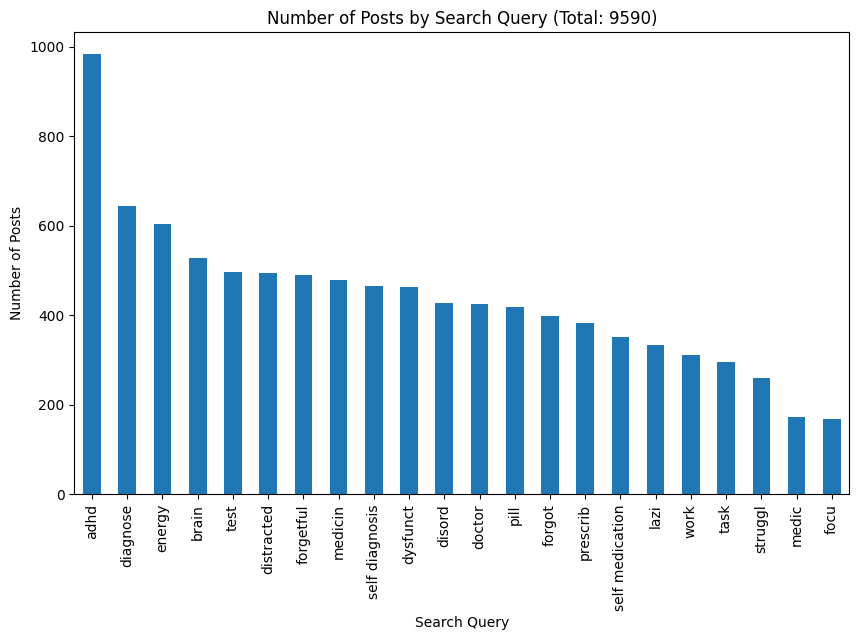

In [ ]:
import matplotlib.pyplot as plt

# Aggregate by a certain column, for example 'searchQuery'
aggregated_data = posts_registered_df['searchQuery'].value_counts()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar')
plt.title('Number of Posts by Search Query (Total: {})'.format(len(posts_registered_df)))
plt.xlabel('Search Query')
plt.ylabel('Number of Posts')
plt.show()

/tmp/ipykernel_13142/2338916411.py:8: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  utc_time = datetime.datetime.utcfromtimestamp(timestamp)


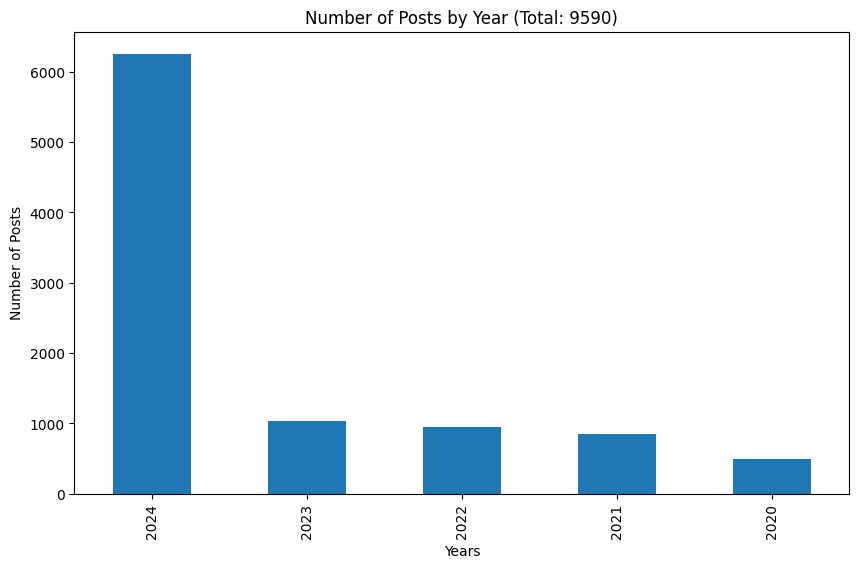

In [12]:
import matplotlib.pyplot as plt

# Aggregate by a certain column, for example 'searchQuery'
posts_registered_df['created_at']=posts_registered_df['created_at'].apply(get_utc_time)
posts_registered_df['created_year']=posts_registered_df['created_at'].apply(get_year)

aggregated_data = posts_registered_df['created_year'].value_counts()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar')
plt.title('Number of Posts by Year (Total: {})'.format(len(posts_registered_df)))
plt.xlabel('Years')
plt.ylabel('Number of Posts')
plt.show()

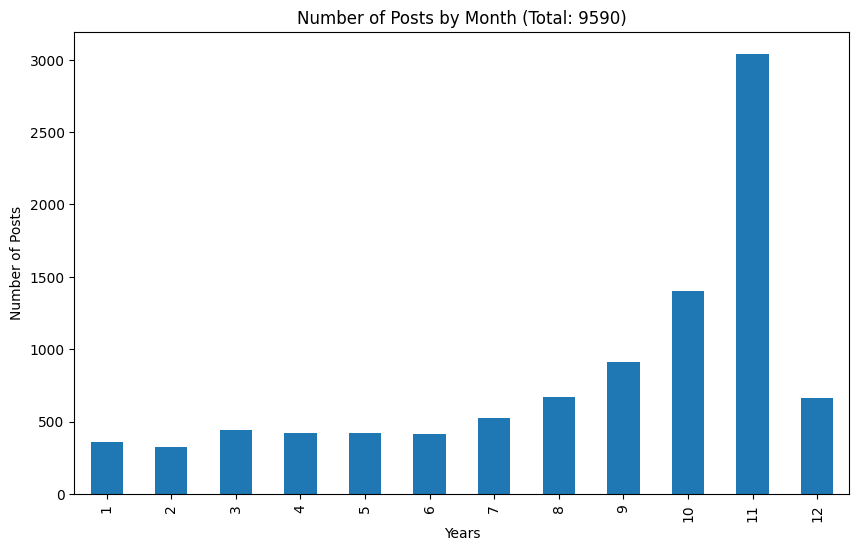

In [23]:
import matplotlib.pyplot as plt

# Aggregate by a certain column, for example 'searchQuery'
posts_registered_df['created_month']=posts_registered_df['created_at'].apply(get_month)


aggregated_data = posts_registered_df['created_month'].value_counts()
aggregated_data = aggregated_data.sort_index()


# Plot the aggregated data
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar')
plt.title('Number of Posts by Month (Total: {})'.format(len(posts_registered_df)))
plt.xlabel('Years')
plt.ylabel('Number of Posts')
plt.show()

<Figure size 2000x2000 with 0 Axes>

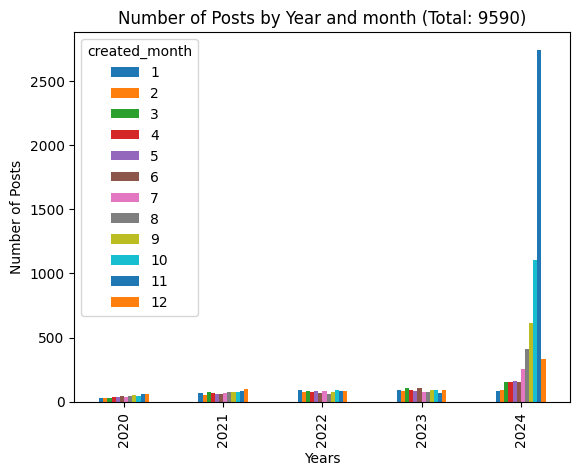

In [24]:
import matplotlib.pyplot as plt

# Aggregate by a certain column, for example 'searchQuery'
aggregated_data = posts_registered_df.groupby(['created_year', 'created_month']).size().unstack(fill_value=0)
aggregated_data=aggregated_data.sort_index()


# Plot the aggregated data
plt.figure(figsize=(20, 20))
aggregated_data.plot(kind='bar')
plt.title('Number of Posts by Year and month (Total: {})'.format(len(posts_registered_df)))
plt.xlabel('Years')
plt.ylabel('Number of Posts')
plt.show()

- It seems that we have a peak of posts around the date at which we have realized the scrapping (done in Deember 2024) hence the peak might simply a result of the tweaked algorithm of reddit's search in order to provide newer posts hence for this sake we would only analyse the posts comming from the other years

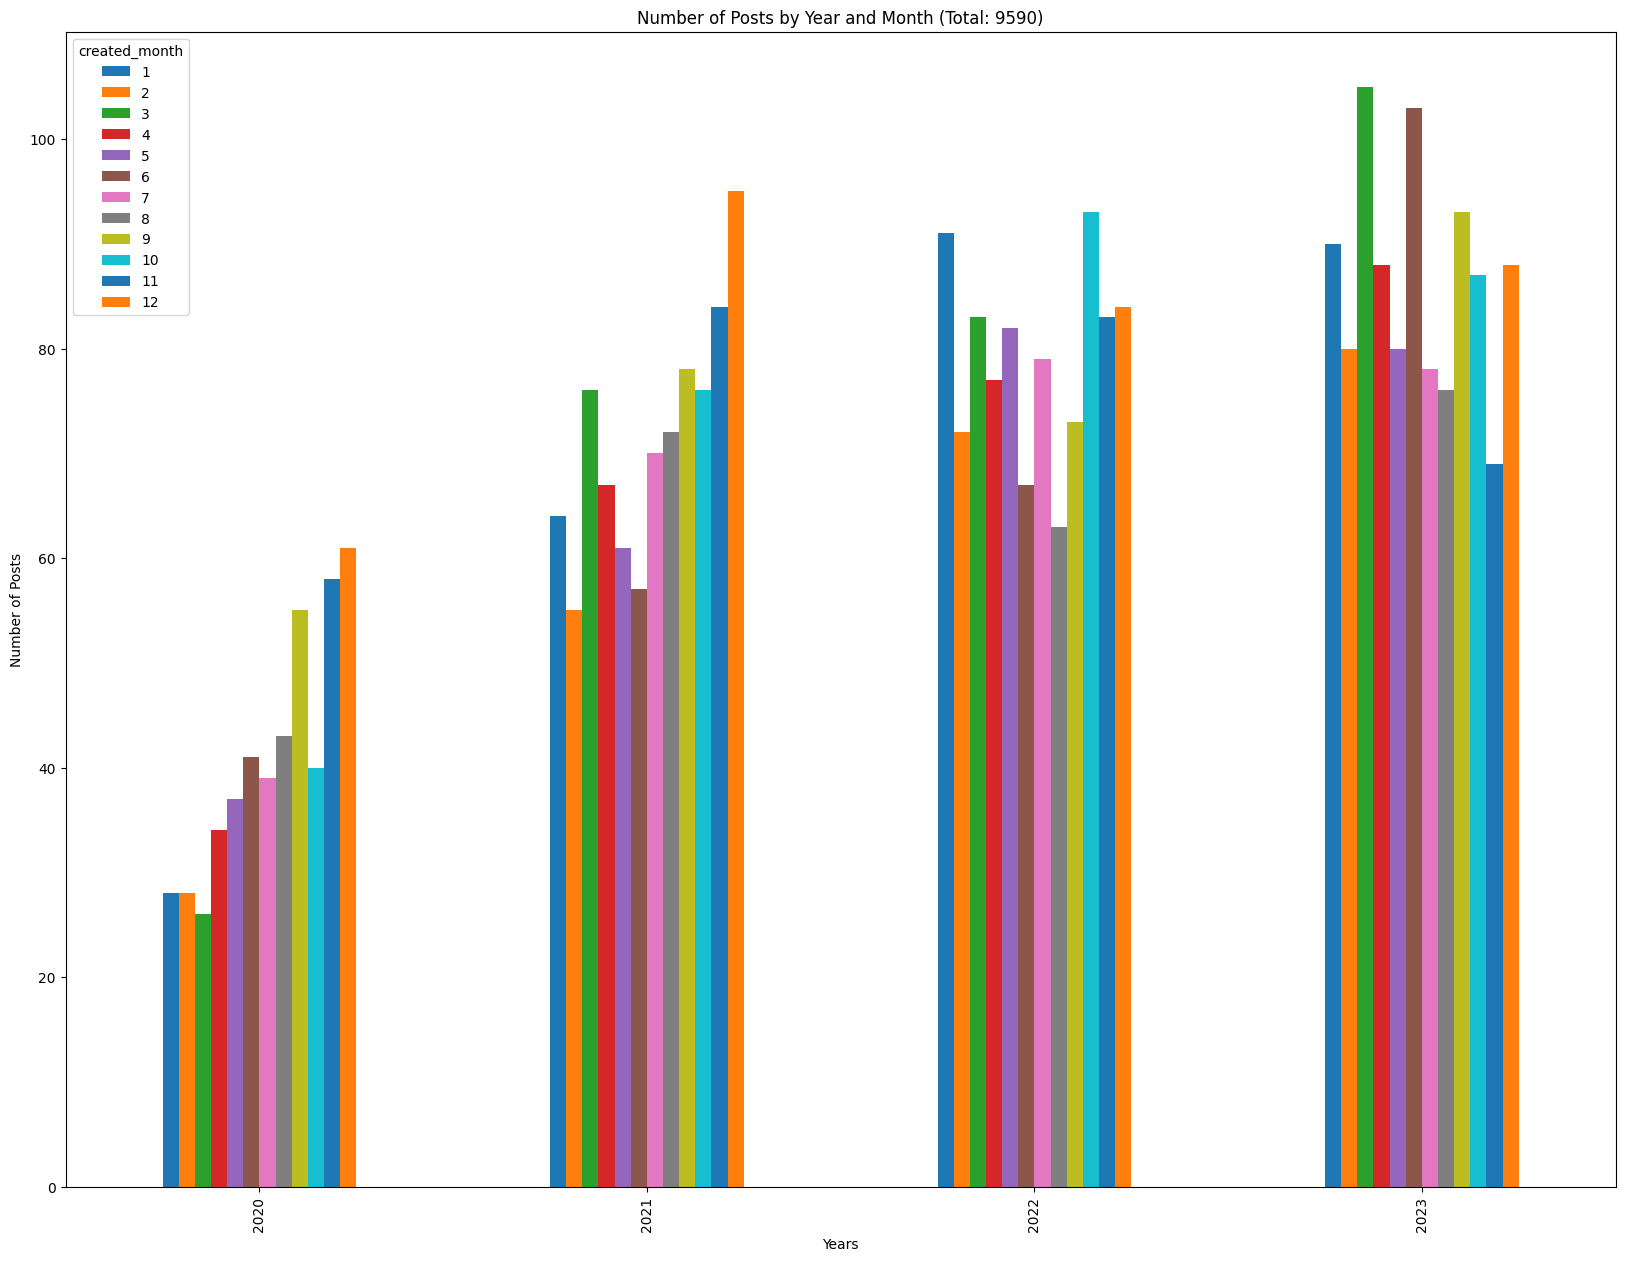

In [28]:
eliminated_data = posts_registered_df[posts_registered_df['created_year'] < 2024]

# Aggregate by a certain column, for example 'searchQuery'
aggregated_data = eliminated_data.groupby(['created_year', 'created_month']).size().unstack(fill_value=0)
aggregated_data=aggregated_data.sort_index()


# Plot the aggregated data in a subplot
fig, ax = plt.subplots(figsize=(20, 15))
aggregated_data.plot(kind='bar', ax=ax)
ax.set_title('Number of Posts by Year and Month (Total: {})'.format(len(posts_registered_df)))
ax.set_xlabel('Years')
ax.set_ylabel('Number of Posts')
plt.show()

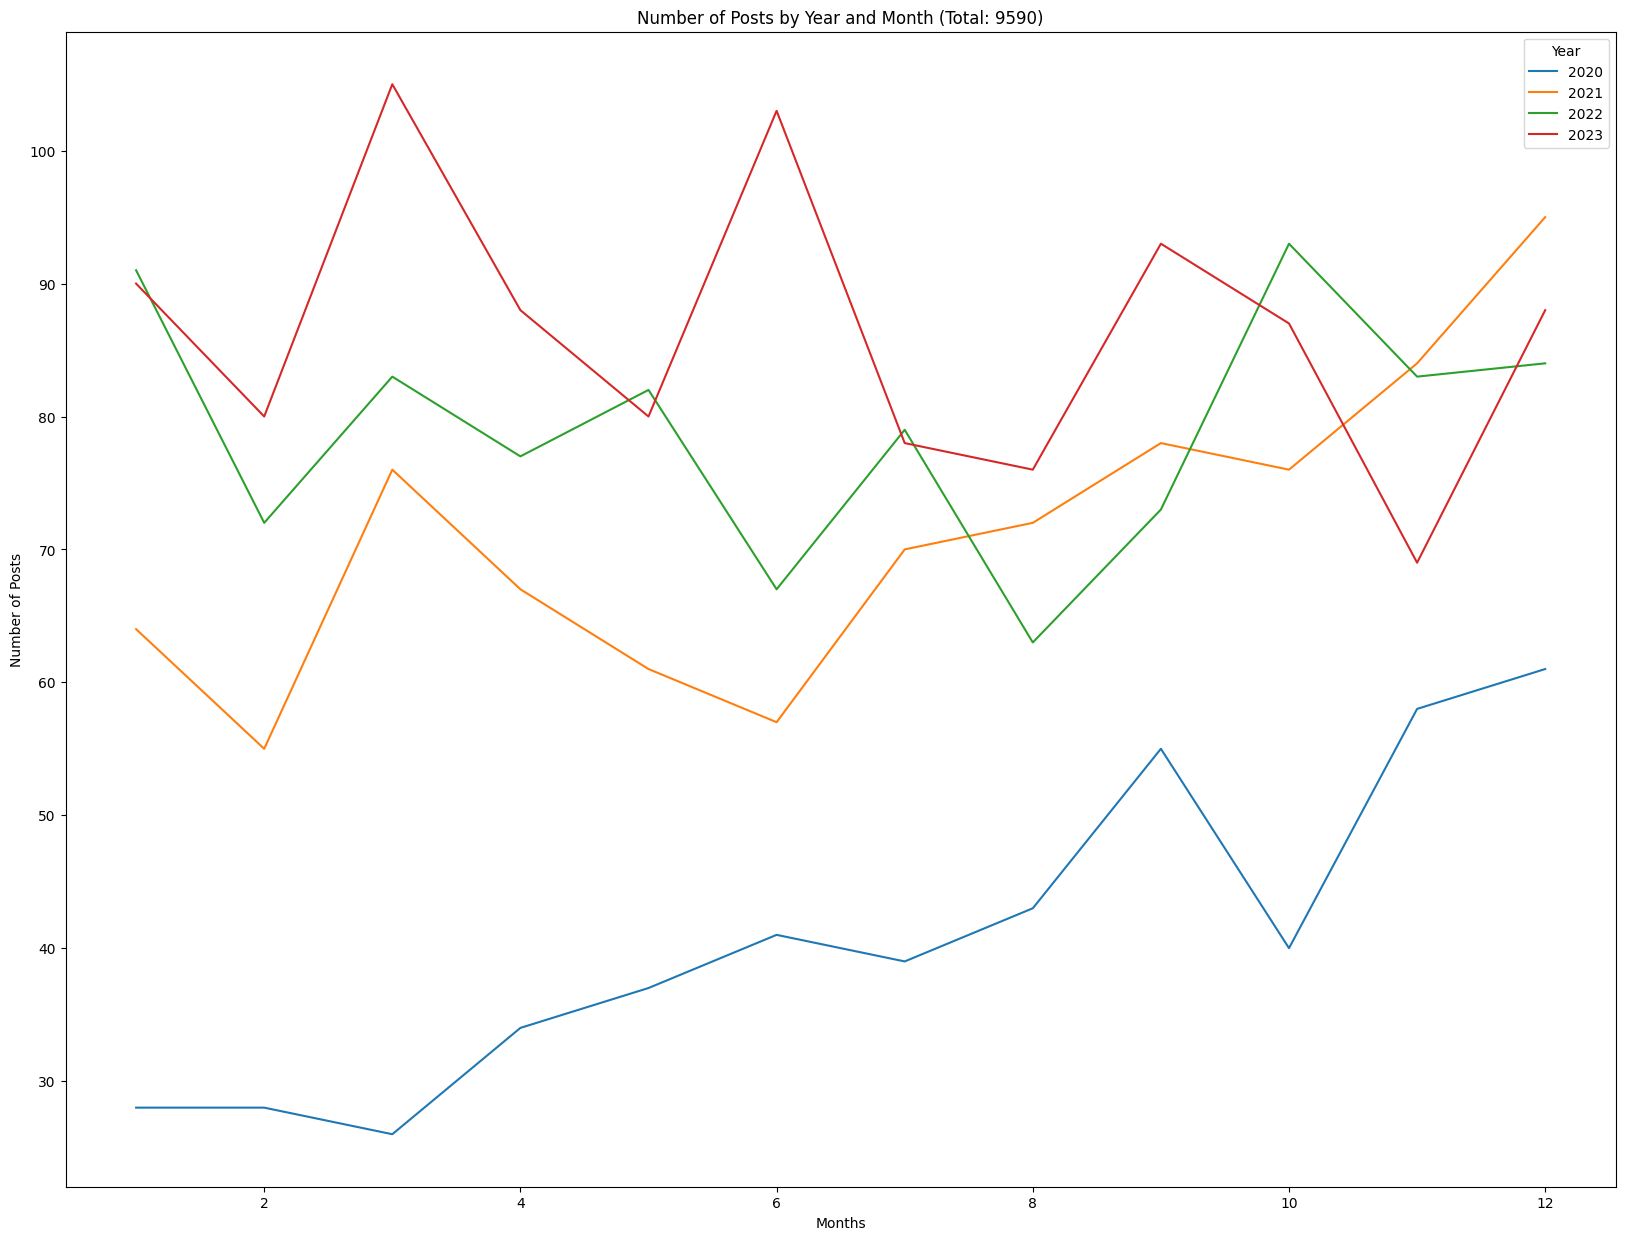

In [30]:
eliminated_data = posts_registered_df[posts_registered_df['created_year'] < 2024]

# Aggregate by a certain column, for example 'searchQuery'
aggregated_data = eliminated_data.groupby(['created_year', 'created_month']).size().unstack(fill_value=0)
aggregated_data=aggregated_data.sort_index()



# Plot the aggregated data as a line chart for each year
fig, ax = plt.subplots(figsize=(20, 15))
for year in aggregated_data.index:
    ax.plot(aggregated_data.columns, aggregated_data.loc[year], label=str(year))

ax.set_title('Number of Posts by Year and Month (Total: {})'.format(len(posts_registered_df)))
ax.set_xlabel('Months')
ax.set_ylabel('Number of Posts')
ax.legend(title='Year')
plt.show()